# Збір даних

Перш за все, потрібно зібрати дані з акселерометра мобільного телефону.

In [2]:
from google.colab import drive
import pandas as pd
from pathlib import Path

# Монтируем Google Диск
drive.mount('/content/drive', force_remount=True)
# Шлях до папки з даними
root_dir = Path('/content/drive/My Drive/Colab Notebooks/Lesson.8.Опорні_Вектори_та_Дерева')
data_dir = root_dir / 'accelerometer_data'

# Перелік активностей
activities = ['idle', 'running', 'stairs', 'walking']
data_collections = []

# Завантаження та обробка CSV файлів
for activity in activities:
    activity_path = data_dir / activity
    print(f"Обробляємо папку: {activity_path}")

    # Перевіряємо, чи існує папка та чи є в ній файли
    if activity_path.exists() and activity_path.is_dir():
        csv_files = list(activity_path.glob('*.csv'))

        if csv_files:
            # Зчитуємо та об'єднуємо всі CSV файли для даної активності
            df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)
            df['activity'] = activity  # Додаємо колонку з активністю
            data_collections.append(df)
        else:
            print(f"Попередження: У папці {activity_path} немає CSV файлів.")
    else:
        print(f"Попередження: Папка {activity_path} не знайдена.")

# Об'єднуємо всі дані в один DataFrame
if data_collections:
    data = pd.concat(data_collections, ignore_index=True)
    print(data)
else:
    print("Не вдалося створити датасет. Перевірте наявність CSV файлів у папках.")

Mounted at /content/drive
Обробляємо папку: /content/drive/My Drive/Colab Notebooks/Lesson.8.Опорні_Вектори_та_Дерева/accelerometer_data/idle
Обробляємо папку: /content/drive/My Drive/Colab Notebooks/Lesson.8.Опорні_Вектори_та_Дерева/accelerometer_data/running
Обробляємо папку: /content/drive/My Drive/Colab Notebooks/Lesson.8.Опорні_Вектори_та_Дерева/accelerometer_data/stairs
Обробляємо папку: /content/drive/My Drive/Colab Notebooks/Lesson.8.Опорні_Вектори_та_Дерева/accelerometer_data/walking
        accelerometer_X  accelerometer_Y  accelerometer_Z activity
0              0.330400        -0.124498         9.773131     idle
1             -0.095768        -2.001553         9.543288     idle
2              7.637504         2.547431        -0.296881     idle
3             -3.825934         5.276821         7.149087     idle
4              1.407791         7.417237         7.661446     idle
...                 ...              ...              ...      ...
193855        -1.604115        -2

In [3]:
data

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,0.330400,-0.124498,9.773131,idle
1,-0.095768,-2.001553,9.543288,idle
2,7.637504,2.547431,-0.296881,idle
3,-3.825934,5.276821,7.149087,idle
4,1.407791,7.417237,7.661446,idle
...,...,...,...,...
193855,-1.604115,-2.432509,1.766921,walking
193856,-4.965574,-7.340622,0.134075,walking
193857,-7.704541,-15.069105,-1.225831,walking
193858,-2.676717,-0.857124,7.896077,walking


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Перевірка пропущених значень
print("Пропущені значення:\n", data.isnull().sum())
# Видаляємо рядки з пропущеними значеннями (якщо є)
cleaned_data = data.dropna()

# Перевірка наявності дублікатів
print("\nКількість дублікатів:", cleaned_data.duplicated().sum())
# Видаляємо дублікатні рядки (якщо є)
cleaned_data = cleaned_data.drop_duplicates()
# Скидаємо індекси
cleaned_data = cleaned_data.reset_index(drop=True)

# Основна статистика датасету
print("\nОпис даних:")
print(cleaned_data.describe())

# Перевірка класів активності
print("\nРозподіл класів:")
print(cleaned_data['activity'].value_counts())

Пропущені значення:
 accelerometer_X    0
accelerometer_Y    0
accelerometer_Z    0
activity           0
dtype: int64

Кількість дублікатів: 180673

Опис даних:
       accelerometer_X  accelerometer_Y  accelerometer_Z
count     13187.000000     13187.000000     13187.000000
mean          1.902512         1.445794         1.756228
std           8.363792        12.462532         7.181267
min         -39.188293       -39.188293       -39.188293
25%          -2.513912        -8.461109        -2.499546
50%           0.248997        -0.014365         0.852336
75%           4.668694         8.494628         7.053318
max          39.188293        39.188293        39.188293

Розподіл класів:
activity
running    6872
walking    3840
idle       2033
stairs      442
Name: count, dtype: int64


In [29]:
# після очистки
cleaned_data

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,0.330400,-0.124498,9.773131,idle
1,-0.095768,-2.001553,9.543288,idle
2,7.637504,2.547431,-0.296881,idle
3,-3.825934,5.276821,7.149087,idle
4,1.407791,7.417237,7.661446,idle
...,...,...,...,...
13182,4.429273,2.590526,7.465121,walking
13183,5.837064,0.363919,4.276045,walking
13184,2.585738,3.256114,2.489970,walking
13185,-0.004788,-10.132261,-7.354987,walking


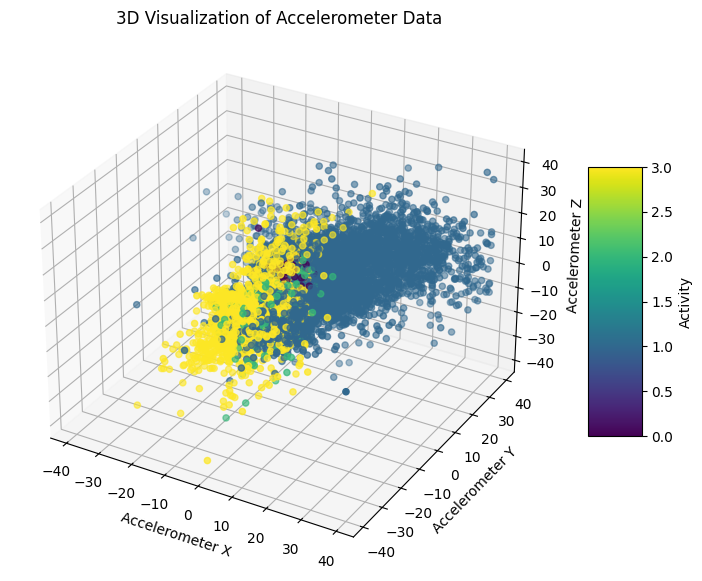

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Створення 3D графіка
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Побудова графіка, кожна точка - це координати акселерометра
ax.scatter(cleaned_data['accelerometer_X'], cleaned_data['accelerometer_Y'], cleaned_data['accelerometer_Z'], c=cleaned_data['activity'].astype('category').cat.codes, cmap='viridis', marker='o')

ax.set_xlabel('Accelerometer X')
ax.set_ylabel('Accelerometer Y')
ax.set_zlabel('Accelerometer Z')

# Додавання колірної шкали
cbar = plt.colorbar(ax.collections[0], ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Activity')

plt.title('3D Visualization of Accelerometer Data')
plt.show()

# Використання Support Vector Machine (SVM) для класифікації та вибір найкращої моделі за F1-мірою


In [31]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Відокремлюємо ознаки та мітки класів
X = cleaned_data.drop(columns=['activity'])  # Всі колонки, крім 'activity'
y = cleaned_data['activity']  # Цільова змінна

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Перемішування та розбиття на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Визначаємо параметр C
C = 1.0

# Визначаємо моделі SVM з class_weight="balanced"
svm_models = {
    "Linear SVM": svm.SVC(kernel="linear", C=C, class_weight="balanced"),
    "LinearSVC": svm.LinearSVC(C=C, max_iter=10000, class_weight="balanced"),
    "RBF SVM": svm.SVC(kernel="rbf", gamma=0.7, C=C, class_weight="balanced"),
    "Polynomial SVM": svm.SVC(kernel="poly", degree=3, gamma="auto", C=C, class_weight="balanced")
}

# Для збереження найкращої моделі за F1-мірою
best_svm_model = None
best_svm_f1 = 0
best_svm_model_name = ""

# Навчання та оцінка моделей
for name, model in svm_models.items():
    # Навчання
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Результати {name}:")
    # Додаємо zero_division=1 для уникнення попереджень
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    print(classification_report(y_test, y_pred, zero_division=1))
    print("-----------------------------------------------------\n")

    # Оцінюємо F1-міру (weighted avg)
    f1_score = report['weighted avg']['f1-score']

    # Якщо поточна модель має кращу F1-міру, оновлюємо
    if f1_score > best_svm_f1:
        best_svm_f1 = f1_score
        best_svm_model = model
        best_svm_model_name = name

# Виводимо найкращу модель
print(f"Найкраща модель: {best_svm_model_name} з F1-мірою: {best_svm_f1}")

Результати Linear SVM:
              precision    recall  f1-score   support

        idle       0.73      0.98      0.84       407
     running       0.97      0.68      0.80      1375
      stairs       0.10      0.67      0.18        88
     walking       0.85      0.63      0.73       768

    accuracy                           0.71      2638
   macro avg       0.67      0.74      0.64      2638
weighted avg       0.87      0.71      0.76      2638

-----------------------------------------------------

Результати LinearSVC:
              precision    recall  f1-score   support

        idle       0.72      0.86      0.78       407
     running       0.90      0.81      0.85      1375
      stairs       0.09      0.05      0.06        88
     walking       0.75      0.85      0.80       768

    accuracy                           0.80      2638
   macro avg       0.61      0.64      0.62      2638
weighted avg       0.80      0.80      0.80      2638

------------------------------

In [32]:
# Precision (Точність) — це частка правильних передбачень серед усіх випадків, коли модель передбачала певний клас.
# Наприклад, якщо модель передбачає, що об'єкт належить до класу "running", точність показує,
# як часто це передбачення виявляється правильним серед усіх випадків, коли модель передбачала "running".

# Recall (Відгук, чутливість) — це частка правильних передбачень серед усіх реальних випадків певного класу.
# Цей показник вказує, скільки реальних об'єктів конкретного класу модель змогла правильно ідентифікувати.

# F1-score (F1-міра) — середнє гармонійне між точністю (precision) та відгуком (recall).
# F1-міра дозволяє знайти баланс між цими двома показниками, особливо коли є необхідність зберегти рівновагу між помилками першого та другого роду.

# Support (Підтримка) — кількість реальних елементів або спостережень для кожного класу в тестовому наборі даних.
# Це показник того, скільки зразків належить до кожного класу.

# Accuracy (Точність) — це загальна частка правильних передбачень серед усіх спостережень,
# що відображає, яку частину з усіх прикладів модель класифікувала правильно.

# Macro Average (Макро-середнє) — середнє значення показників для кожного класу (точності, відгуку або F1-міри),
# обчислене без урахування їх частоти у вибірці. У макро-середньому кожен клас має однакову вагу,
# що може сильно впливати на результат, якщо класи нерівномірно представлені.

# Weighted Average (Вагове середнє) — середнє значення, де кожен клас зважується відповідно до його підтримки (кількості прикладів).
# Це корисно, коли класів у вибірці багато і вони нерівномірно розподілені, оскільки цей показник враховує як ефективність моделі на рідкісних класах, так і на частих.

In [33]:
# Тепер ми можемо використовувати найкращу модель для прогнозів на тестових даних або на підмножині тестових даних
# Наприклад, використовуємо перші 5 тестових прикладів:
X_test_subset = X_test[:5]  # Перша п'ятірка тестових прикладів
y_test_subset = y_test[:5]  # Реальні мітки для цих прикладів

# Передбачення на вибраних тестових даних
y_pred_subset = best_svm_model.predict(X_test_subset)

# Виведення результатів
print("Передбачення для тестових прикладів:")
for i, pred in enumerate(y_pred_subset):
    print(f"Приклад {i+1} - Реальна мітка: {y_test_subset.iloc[i]}, Передбачена мітка: {pred}")

Передбачення для тестових прикладів:
Приклад 1 - Реальна мітка: idle, Передбачена мітка: idle
Приклад 2 - Реальна мітка: running, Передбачена мітка: running
Приклад 3 - Реальна мітка: running, Передбачена мітка: running
Приклад 4 - Реальна мітка: idle, Передбачена мітка: idle
Приклад 5 - Реальна мітка: walking, Передбачена мітка: walking


# Використання Random Forest для класифікації та вибір найкращої моделі за F1-мірою

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

# Відокремлюємо ознаки та мітки класів
X = cleaned_data.drop(columns=['activity'])  # Всі колонки, крім 'activity'
y = cleaned_data['activity']  # Цільова змінна

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Перемішування та розбиття на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Параметри для експериментів
params = [
    {'n_estimators': 500, 'max_depth': None, 'max_features': 'sqrt'},
    {'n_estimators': 100, 'max_depth': 5, 'max_features': 'sqrt'},
    {'n_estimators': 200, 'max_depth': 10, 'max_features': 'sqrt'},
    {'n_estimators': 300, 'max_depth': 20, 'max_features': 'log2'}
]

best_f1_score = -1  # Мінімальне можливе значення F1-скор
best_rf_model = None  # Краща модель

# Моделі для порівняння
for i, param in enumerate(params):
    # Створення моделі Random Forest з різними параметрами
    rf_model = RandomForestClassifier(
        n_estimators=param['n_estimators'],
        max_depth=param['max_depth'],
        max_features=param['max_features'],
        random_state=42,
        class_weight="balanced"
    )

    # Навчання моделі
    rf_model.fit(X_train, y_train)

    # Передбачення на тестових даних
    y_pred = rf_model.predict(X_test)

    # Оцінка результатів
    f1 = f1_score(y_test, y_pred, average='weighted')  # Зважений F1-скор для мультикласової задачі

    # Якщо поточна модель має кращий F1-скор, оновлюємо найкращу модель
    if f1 > best_f1_score:
        best_f1_score = f1
        best_rf_model = rf_model
        best_rf_params = param

    print(f"Результати моделі {i+1} з параметрами {param}:")
    print(classification_report(y_test, y_pred, zero_division=1))
    print(f"Зважений F1-скор: {f1}")
    print("-----------------------------------------------------\n")

# Після завершення циклу
print("Краща модель Random Forest:")
print(f"Параметри: {best_rf_params}")
print(f"Зважений F1-скор: {best_f1_score}")

Результати моделі 1 з параметрами {'n_estimators': 500, 'max_depth': None, 'max_features': 'sqrt'}:
              precision    recall  f1-score   support

        idle       0.99      0.97      0.98       407
     running       0.90      0.91      0.90      1375
      stairs       0.15      0.02      0.04        88
     walking       0.80      0.87      0.83       768

    accuracy                           0.88      2638
   macro avg       0.71      0.69      0.69      2638
weighted avg       0.86      0.88      0.87      2638

Зважений F1-скор: 0.8654517160606432
-----------------------------------------------------

Результати моделі 2 з параметрами {'n_estimators': 100, 'max_depth': 5, 'max_features': 'sqrt'}:
              precision    recall  f1-score   support

        idle       0.95      0.97      0.96       407
     running       0.96      0.80      0.87      1375
      stairs       0.12      0.56      0.19        88
     walking       0.85      0.73      0.78       768

    

In [35]:
# Перевірка найкращої моделі на підмножині тестових даних
# Тепер ми можемо використовувати найкращу модель для прогнозів на тестових даних або на підмножині тестових даних
X_test_subset = X_test[:5]  # Перша п'ятірка тестових прикладів
y_test_subset = y_test[:5]  # Реальні мітки для цих прикладів

# Передбачення на вибраних тестових даних
y_pred_subset = best_rf_model.predict(X_test_subset)

# Виведення результатів
print("Передбачення для тестових прикладів:")
for i, pred in enumerate(y_pred_subset):
    print(f"Приклад {i+1} - Реальна мітка: {y_test_subset.iloc[i]}, Передбачена мітка: {pred}")

Передбачення для тестових прикладів:
Приклад 1 - Реальна мітка: idle, Передбачена мітка: idle
Приклад 2 - Реальна мітка: running, Передбачена мітка: running
Приклад 3 - Реальна мітка: running, Передбачена мітка: running
Приклад 4 - Реальна мітка: idle, Передбачена мітка: idle
Приклад 5 - Реальна мітка: walking, Передбачена мітка: walking


## Порівнюємо точність результатів

Визначаємо точність моделей на тестовому наборі та порівнюємо

In [36]:
score_svm = best_svm_model.score(X_test, y_test)
score_rf = best_rf_model.score(X_test, y_test)

print(f"Точність моделі SVM: {score_svm:.3f}")
print(f"Точність моделі випадкового лісу: {score_rf:.3f}")

Точність моделі SVM: 0.784
Точність моделі випадкового лісу: 0.877


## Прогнозування

In [37]:
# Передбачення міток класів для тестового набору за допомогою найкращої SVM-моделі
y_predicted_svm = best_svm_model.predict(X_test)

# Передбачення міток класів для тестового набору за допомогою найкращої моделі Random Forest
y_predicted_rf = best_rf_model.predict(X_test)

In [38]:
y_predicted_svm

array(['idle', 'running', 'running', ..., 'running', 'running', 'running'],
      dtype=object)

In [39]:
y_predicted_rf

array(['idle', 'running', 'running', ..., 'running', 'running', 'running'],
      dtype=object)

Побудуємо матрицю помилок (`confusion matrix`).

Матрицю помилок - це таблиця, яку використовують для оцінювання продуктивності класифікаційної моделі. Вона дає змогу порівняти фактичні та передбачені класифікатором мітки для кожного об'єкта в тестовій вибірці.

In [40]:
from sklearn.metrics import confusion_matrix

# Обчислення матриці конфузій (confusion matrix) для найкращої SVM-моделі
conf_matrix_svm = confusion_matrix(y_test, y_predicted_svm)

# Обчислення матриці конфузій для найкращої моделі Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_predicted_rf)

# Матриця конфузій дозволяє оцінити, як добре модель передбачає класи:
# Кожен рядок представляє реальні класи (ground truth).
# Кожен стовпець представляє передбачені моделі класи.
# Діагональні значення вказують на правильні передбачення, а решта — на помилки.

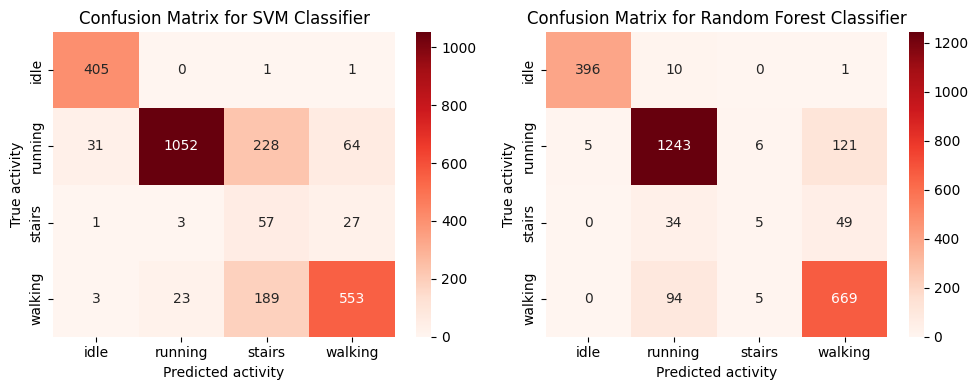

In [41]:
# Створення двох підграфіків для візуалізації матриць конфузій
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Назви класифікаторів та відповідні матриці конфузій
classifiers = ["SVM", "Random Forest"]
confusion_matrices = [conf_matrix_svm, conf_matrix_rf]

# Візуалізація кожної матриці конфузій у вигляді теплової карти (heatmap)
for i, classifier in enumerate(classifiers):
    sns.heatmap(
        confusion_matrices[i],   # Вибираємо відповідну матрицю конфузій
        annot=True,              # Відображаємо значення у комірках
        fmt='d',                 # Формат значень (цілі числа)
        cmap='Reds',             # Використовуємо колірну схему "Reds"
        xticklabels=activities,  # Підписи для осі X (список активностей)
        yticklabels=activities,  # Підписи для осі Y (список активностей)
        ax=axes[i],              # Вказуємо підграфік для малювання
    )

    # Додаємо заголовок для кожної матриці
    axes[i].set_title(f"Confusion Matrix for {classifier} Classifier")
    axes[i].set_xlabel("Predicted activity")
    axes[i].set_ylabel("True activity")

# Оптимізація відстаней між підграфіками для кращого вигляду
plt.tight_layout()

# Відображення графіків
plt.show()

- Як видно, класифікатор `SVM` на тестових даних помилився, класифікувавши ходіння по сходах (`stairs`) як прогулянку (`walking`) 27 разів, як `running` 3 рази та як `idle` 1 раз. Тобто, погано розпізнає ходіння по сходах.

- Класифікатор `ramdom forest` на тестових даних помилився у 34 та 49 випадках, класифікувавши ходіння по сходах (`stairs`) як `running` та `walking`.

Слід сказати. що набір даних для `stairs` був найменшим з усіх інших. Тому тут бажано було б набрати більше даних, тоді може `SVM` та `ramdom forest` дали би кращі результати.

# Тренування на підготовленних даних

## Вибираємо ознаки

В [статті](https://www.sciencedirect.com/science/article/pii/S1877050916322153) [1] пропонується обрати наступні часові ознаки (таблиця 3). Як пишуть автори, їхні результати показують, що найбільш репрезентативні ознаки отримані з часового представлення сигналу акселерометра. Ознаки, витягнуті з сигналів по осях $x$ і $y$ є більш релевантними, ніж ознаки по осі $z$ при визначенні активності.

| Name                          | Axis |
| ----------------------------- | ---- |
| Maximum Value                 |   x  |
| Minimum Value                 |   x  |
| Entropy                       |   x  |
| Interquartile Range           |   x  |
| Maximum Value                 |   y  |
| Index of Minimum Value        |   y  |
| Mean of Absolute Deviation    |   y  |
| Median                        |   y  |
| Skewness                      |   y  |
| Standard Deviation            |   y  |
| Root Mean Square Error        |   y  |
| Skewness                      |   z  |

In [42]:
import numpy as np

def iqr(data):
    """Обчислює міжквартильний розмах (IQR) для набору даних.

    IQR - це різниця між 75-м і 25-м перцентилями, яка показує розкид центральних 50% даних.

    Аргументи:
        data: NumPy-масив або Pandas Series, що містить набір даних.

    Повертає:
        Значення IQR.
    """
    sorted_data = np.sort(data)
    Q1 = np.percentile(sorted_data, 25)
    Q3 = np.percentile(sorted_data, 75)
    IQR = Q3 - Q1
    return IQR


def argmin(data):
    """Повертає індекс мінімального значення у наборі даних.

    Аргументи:
        data: NumPy-масив або Pandas Series, що містить набір даних.

    Повертає:
        Індекс мінімального значення.
    """
    return np.argmin(data)


def entropy(column_data):
    """Обчислює ентропію для заданого стовпця даних.

    Ентропія є мірою невизначеності або випадковості даних. Вона обчислюється за формулою:

    ```
    H = -sum(pk * log2(pk))
    ```

    де pk - ймовірність кожного унікального значення в наборі даних.

    Аргументи:
        column_data: NumPy-масив або Pandas Series, що містить набір даних.

    Повертає:
        Значення ентропії.
    """
    hist, bins = np.histogram(column_data, bins='auto')
    probs = hist / len(column_data)
    probs = probs[probs > 0]  # Прибираємо нульові ймовірності, щоб уникнути log2(0)
    entropy = -np.sum(probs * np.log2(probs))
    return entropy


def mad(data):
    """Обчислює медіанне абсолютне відхилення (MAD) для набору даних.

    MAD - це міра розкиду даних, яка обчислюється як медіана абсолютних відхилень від медіани.
    MAD є більш стійким до викидів у порівнянні зі стандартним відхиленням.

    Аргументи:
        data: NumPy-масив або Pandas Series, що містить набір даних.

    Повертає:
        Значення MAD.
    """
    mean = np.mean(data)
    absolute_deviations = np.abs(data - mean)
    mad = np.mean(absolute_deviations)
    return mad


def rmse(data):
    """Обчислює корінь середньоквадратичної похибки (RMSE) для набору даних.

    RMSE - це показник середньої похибки між фактичними значеннями у наборі даних та їх передбаченими значеннями.
    Він обчислюється за формулою:

    ```
    RMSE = sqrt(mean((y_true - y_pred)**2))
    ```

    де:
    * `y_true` - реальні значення у наборі даних.
    * `y_pred` - передбачені значення.

    RMSE є важливим показником якості регресійних моделей.

    Аргументи:
        data: NumPy-масив або Pandas Series, що містить набір даних.

    Повертає:
        Значення RMSE.
    """
    mean = np.mean(data)
    squared_errors = [(x - mean) ** 2 for x in data]
    rmse = np.sqrt(np.mean(squared_errors))
    return rmse

## Створення датасету на основі ознак, вказанних в статті

In [43]:
# Відокремлюємо ознаки та мітки класів
X = cleaned_data.drop(columns=['activity'])  # Всі колонки, крім 'activity'
y = cleaned_data['activity']  # Цільова змінна

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Створюємо ndata з масштабованими ознаками та додаємо мітки класів
ndata = pd.DataFrame(X_scaled, columns=X.columns)  # Перетворюємо масштабовані дані на DataFrame
ndata['activity'] = y.values  # Додаємо мітки класів



axis_aggregations = {
    'accelerometer_X': ["max", "min", entropy, iqr],
    'accelerometer_Y': ["max", argmin, mad, "median", "skew", "std", rmse],
    'accelerometer_Z': ["skew"]
}

data_tdf = pd.DataFrame()


for axis, functions in axis_aggregations.items():
    axis_data = ndata.groupby(["activity", ndata.index // 30])[axis].agg(functions)

    multiindex = pd.MultiIndex.from_product([[axis], axis_data.columns])

    axis_data.columns = multiindex
    data_tdf = pd.concat([data_tdf, axis_data], axis=1)

data_tdf.reset_index(level=0, inplace=True)

In [44]:
# Утворений датасет на основі ознак таблиці 3 статті [1]

data_tdf

activity accelerometer_X                               accelerometer_Y  \
                         max       min   entropy       iqr             max   
0       idle        0.685719 -0.684936  2.731123  0.059830        0.498766   
1       idle       -0.115261 -1.476756  2.620788  0.005582        0.233257   
2       idle       -0.205150 -0.350002  2.560103  0.033064        0.410391   
3       idle       -0.162782 -0.513175  2.307894  0.047664        0.415770   
4       idle       -0.064305 -0.408400  2.194949  0.096902        0.434598   
..       ...             ...       ...       ...       ...             ...   
435  walking        0.481895 -2.086508  2.558708  0.526591        0.612885   
436  walking       -0.110108 -2.001772  2.220788  0.533891       -0.129464   
437  walking        0.724651 -1.755009  2.368925  0.653122        0.801930   
438  walking        1.150619 -1.686304  2.074628  0.944258       -0.017266   
439  walking        0.602128 -0.957464  2.498078  0.562232        0.145266   

                                                             accelerometer_Z  
    argmin       mad    median      skew       std      rmse            skew  
0        1  0.090204  0.307415 -2.281316  0.160701  0.158000       -3.314667  
1       27  0.028413 -0.116976  3.423046  0.072363  0.071147       -4.634510  
2       18  0.041626  0.292238  0.955217  0.049069  0.048244       -0.644054  
3       19  0.043840  0.285898  0.314756  0.050644  0.049793       -1.333492  
4        4  0.038328  0.348529 -0.237110  0.048026  0.047219       -0.216130  
..     ...       ...       ...       ...       ...       ...             ...  
435     25  0.333173 -0.789778  1.407056  0.471910  0.463979        0.456963  
436     10  0.283225 -0.977671  0.393541  0.358005  0.351988       -1.368044  
437     22  0.392239 -0.829739  1.088845  0.528100  0.519224       -0.070426  
438      5  0.305751 -0.964414  0.561306  0.394579  0.387947        0.117730  
439     15  0.303567 -0.506018  0.402764  0.358229  0.347533       -0.924753  

[443 rows x 13 columns]

In [45]:
features = ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']

X_train, X_test, y_train, y_test = train_test_split(
    data_tdf[features], data_tdf["activity"],
    test_size=0.3,
    stratify=data_tdf["activity"],
)



In [46]:
%%time

model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

CPU times: user 5.6 ms, sys: 0 ns, total: 5.6 ms
Wall time: 5.61 ms


SVC()

In [47]:
%%time

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

CPU times: user 166 ms, sys: 1.99 ms, total: 168 ms
Wall time: 177 ms


RandomForestClassifier()

In [48]:
score_svm = model_svm.score(X_test, y_test)
score_rf = model_rf.score(X_test, y_test)

print(f"Точність моделі SVM: {score_svm:.3f}")
print(f"Точність моделі випадкового лісу: {score_rf:.3f}")

Точність моделі SVM: 0.850
Точність моделі випадкового лісу: 0.970


In [49]:
y_predicted_svm = model_svm.predict(X_test)
y_predicted_rf = model_rf.predict(X_test)

In [50]:
conf_matrix_svm = confusion_matrix(y_test, y_predicted_svm)
conf_matrix_rf = confusion_matrix(y_test, y_predicted_rf)

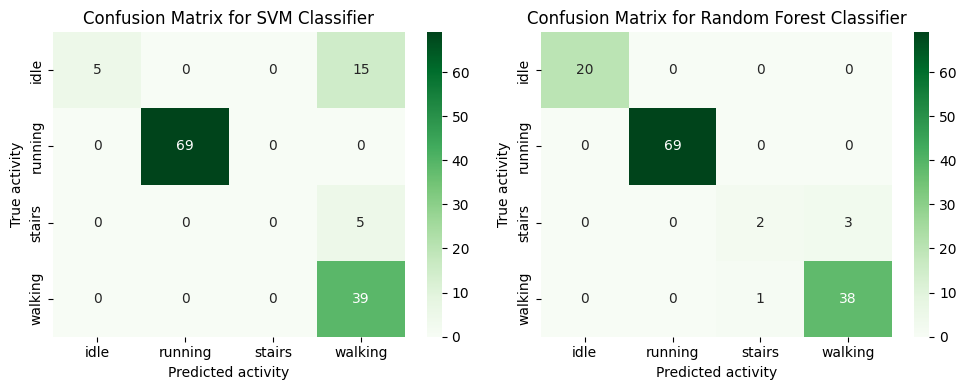

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

classifiers = ["SVM", "Random Forest"]
confusion_matrices = [conf_matrix_svm, conf_matrix_rf]

for i, classifier in enumerate(classifiers):
    sns.heatmap(
        confusion_matrices[i],
        annot=True,
        fmt='d',
        cmap='Greens',
        xticklabels=activities,
        yticklabels=activities,
        ax=axes[i],
    )
    axes[i].set_title(f"Confusion Matrix for {classifier} Classifier")
    axes[i].set_xlabel("Predicted activity")
    axes[i].set_ylabel("True activity")

plt.tight_layout()

plt.show()

# Результати та висновки (взято із іншого-подібного аналізу та потрібно скорегувати)


1. Для навчання алгоритму `SVN` на __вихідних ознаках__ (показах акселерометра по трьох осях) потрібно близько 20 хвилин на стандартному комп'ютері. Навчання на вихідних ознаках (показах акселерометра по трьох осях) спричиняє довге навчання, оскільки алгоритм `SVN` має велику кількість параметрів, які потрібно оптимізувати. Це пов'язано з тим, що алгоритм `SVN` намагається знайти оптимальну підмножину ознак, яка найкраще класифікує дані. У випадку з даними про рух людини, які мають багато шуму і невизначеності, це може бути дуже складним завданням.

2. Навчання на __нормалізованих ознаках__ акселерометра по трьох осях зменшує час навчання алгоритму `SVN` близько 4 хвилин. Навчання на нормалізованих величинах акселерометра по трьох осях дає значний виграш при навчання по методу `SVN`. Нормалізація показів акселерометра по трьох осях усуває масштабування, яке може призвести до переваги одних ознак над іншими. Це також робить дані більш однорідними, що полегшує задачу навчання алгоритму `SVN`.
    - час розрахунку близько 13 секунд;
    - точність близька до 0.89.


3. Навчання за методом випадкового лісу показує кращу точність та набагато менший час навчання, оскільки це більш стійкий до шуму і невизначеності алгоритм. Метод випадкового лісу генерує декілька дерев рішень, і кожен з них голосує за класифікацію. Це дозволяє алгоритму випадкового лісу бути більш точним, ніж алгоритм `SVN`, який генерує лише одне дерево рішень. Крім того, метод випадкового лісу має набагато меншу кількість параметрів, ніж алгоритм `SVN`, що також сприяє його більш швидкому навчанню.
    - час розрахунку близько 13 секунд;
    - точність близька до 1.00.

4. Навчання, де в якості ознак взяті статистичні ознаки запропоновані в [статті](https://www.sciencedirect.com/science/article/pii/S1877050916322153) [1], отримані по набору з 30 показників акселерометра для кожної осі $x$, $y$ та $z$ показує:
    - точність моделі `SVM` значно підвищилась до значення 0.975, крім того час навчання значно зменшився і становить 46.9 ms.
    - точність моделі `random forest` також підвищилась в порівнянні з навчанням на вихідних нормалізованих судячи з матриці помилок, також час навчання становить 766 ms, що значно менше ніж для навчання на вихідних нормалізованих даних, але натомість він на порядок вище в порявнянні з моделлю `SVN`.

Таблиця з результатами (взято із іншого-подібного аналізу та потрібно скорегувати)

<center>
<table>
<caption>Таблиця. Результати</caption>
<thead>
  <tr>
    <th>Тип ознак</th>
    <th>Алгоритм</th>
    <th>Час розрахунку</th>
    <th>Точність</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td rowspan="2">вихідні нормалізовані</td>
    <td>SVN</td>
    <td>240 s</td>
    <td>0.89</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>13 s</td>
    <td>~ 1.00</td>
  </tr>
  <tr>
    <td rowspan="2">статистичні дані</td>
    <td>SVN</td>
    <td>46.9 ms</td>
    <td>0.98</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>766 ms</td>
    <td>~ 1.00</td>
  </tr>
</tbody>
</table>
</center>

Згідно таблиці, можна зробити висновок, що найкращі результати дає в сенсі час/чточність дає алгоритм `random forest`, який тренувався не на вихідних, а на статистичних ознаках. Ці висновки також підтверджуються аналізом матриці помилок, показує, що класифікатор `random forest` помиляється значно менше, ніж `SVM`. Використання статистичних даних, порівняно з сирими підвищує точність класифікації та знижує час навчання.

# Посилання

[1]: Ç.Berke Erdaş, Işıl Atasoy, Koray Açıcı, Hasan Oğul, Integrating Features for Accelerometer-based Activity Recognition,
Procedia Computer Science, Volume 98, 2016, Pages 522-527, ISSN 1877-0509, https://doi.org/10.1016/j.procs.2016.09.070.